# 3 Fraude en transacciones bancarias

In [2]:
import pandas as pd
import urllib
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

#### (a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

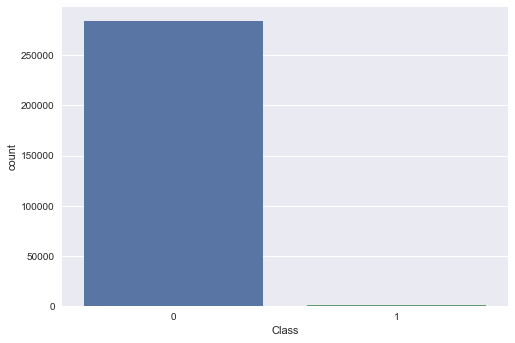

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

In [28]:
count_class = pd.value_counts(dt['Class'].values)
print("===================================================")
print("Cantidad de elementos por clase")
print("===================================================")
print("Elementos pertenecientes a la clase 0 es de", count_class[0])
print("Elementos pertenecientes a la clase 1 es de", count_class[1])
print("===================================================")

Cantidad de elementos por clase
Elementos pertenecientes a la clase 0 es de 284315
Elementos pertenecientes a la clase 1 es de 492


Como podemos apreciar el dataset se encuentra desbalanceado y la diferencia es muy significativa por lo que esto puede traer problemas a la hora de hacer la clasificación de los datos, es decir la clasificacion puede quedar sesgada hacia la clase que posee una mayor cantidad de elementos.

In [30]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Otro dato a tener enconsideracion es la cantidad de caracteristicas que posee este dataset, como podemos apreciar este dataset contiene un total de 30 (Tiempo + monto y otras 28 sin nombre).

#### (b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [32]:
from sklearn.preprocessing import StandardScaler
# Se agrega la columna nAmount con los datos de Amount normalizados 
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
# Se eliminan la columna del tiempo y amount
dt.drop(["Time","Amount"],axis=1,inplace=True)

In [7]:
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Se realiza la estandarización al atributo amount ya que este se encuentra en una escala distinta del resto de las caracteristicas.

#### (c) Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta funcion deberia mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas metricas. Debería además mostrar una curva ROC junto al valor del area bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qu´e es una matriz deconfusión? ¿Que métricas se pueden calcular de esta y cuales nos serán útiles en este experimento? ¿Que es una curva ROC y qu´e relaci´on tiene con la matriz de confusi´on?

In [81]:
from sklearn.metrics import roc_curve, auc

def model(model,features_train,features_test,labels_train,labels_test):
    model2 = model
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+
    cnf_matrix[1,0])))
    fig= plt.figure(figsize=(6,3))
    print("TP: %d"%cnf_matrix[1,1,])
    print("TN: %d"%cnf_matrix[0,0])
    print("FP: %d"%cnf_matrix[0,1])
    print("FN: %d"%cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    
    ''' You have to complete this function, ROC Curve is missing'''
    
    model2.fit(features_train,labels_train.values.ravel())
    yhat = model2.predict(features_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, yhat)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### (d) Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique que está haciendo la función.

In [42]:
from sklearn.model_selection import train_test_split

def data_prepration(x):
    #Se guardan solo las caracteristicas, se omite la columna Class.
    x_features= x.iloc[:,x.columns != "Class"]
    #Se guradan solo las etiquetas correspondietes a las clases.
    x_labels=x.iloc[:,x.columns=="Class"]
    #Se separan en subconjuntos los datas, asignando para entrenamiento y testing.
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    #Se imprime el largo de los nuevos datasets generados. 
    print("Length of training data: %d"%len(x_train))
    print("Length of test data: %d"%len(x_test))
    #Se retornan el train_set y test_set 
    return(x_train,x_test,y_train,y_test)

La funcion data_prepration recibe como input el dataset completo y divide este en las caracteristicas y las clases, luego se aplica la funcion train_test_split a esos dos nuevos subconjuntospara generar los datasets respectivos para entrenamiento y pruebas, es decir x_train, y_train, x_test, y_test. Finalmente retorna estos datasets.

In [43]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)

Length of training data: 199364
Length of test data: 85443


In [64]:
print(y_tr.shape)
print(y_tr.values.ravel().shape)

(199364, 1)
(199364,)


#### (e) Defina una función que realice Undersample [8] . ¿Explique en que consiste esta técnica?

In [47]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,
    (times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print("The normal transacation proportion is : %f"%normal)
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print("The fraud transacation proportion is : %f"%fraud)
    return(undersample_data)

#### (f) Genere un modelo de Logistic Regression y otro a su elecci´on utilizando UnderSample [8] . Concluya a partir de los resultados.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

def apply_log_regression(i):
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)
    print("---------------------------------------------------------------")

Length of training data: 199364
Length of test data: 85443


The undersample data for 1 proportion

The normal transacation proportion is : 0.500000
The fraud transacation proportion is : 0.500000

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 490
Length of test data: 210
The recall for this model is: 0.931034
TP: 81
TN: 119
FP: 4
FN: 6


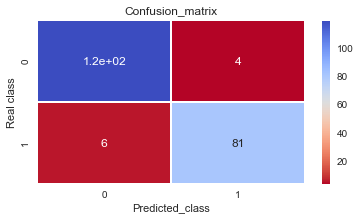


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       123
          1       0.95      0.93      0.94        87

avg / total       0.95      0.95      0.95       210



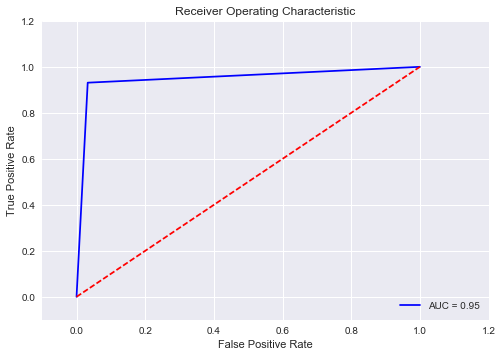

--------------------------Testing Set---------------------------
The recall for this model is: 0.887324
TP: 126
TN: 82449
FP: 2852
FN: 16


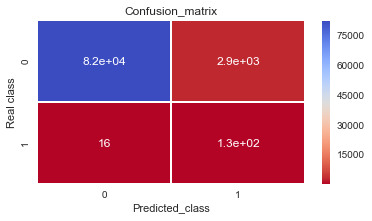


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85301
          1       0.04      0.89      0.08       142

avg / total       1.00      0.97      0.98     85443



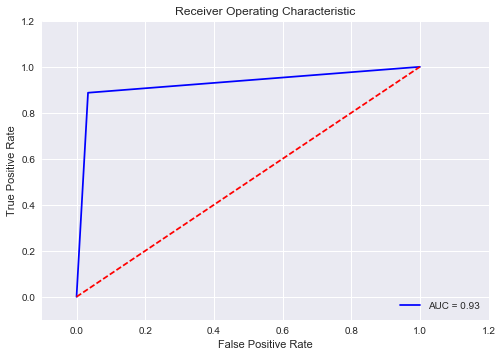

---------------------------------------------------------------


In [82]:
apply_log_regression(1)

In [ ]:
apply_log_regression(2)

In [ ]:
apply_log_regression(3)

In [ ]:
apply_log_regression(4)

#### (g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling [7] y SMOTE [8] (Hint: Para SMOTE usted puede apoyarse de la libreria imblearn)

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(x_tr,y_tr)